# Signal Processing II (Fourier Series)
Author: Chul Min Yeum  
Email: cmyeum@uwaterloo.ca  

Last updated: 2023-10-03

## Table of Contents
* Sinc Function
* Fourier Transform Pairs (Exponentially Decaying Symmetric Function)
* Exponentially Decaying Symmetric Function with Different Lambda Values
* Rectangular Function 
* Rectangular Function with Different Ranges
* Fourier Transform Pairs (Damped Symmetrically Oscillating Function)
* Fourier Transform Pairs (Gaussian Function)
* Gaussian Function with Different Variances

# Sinc Function 

$
\text{sinc}(x) = 
\begin{cases} 
1 & \text{for } x = 0 \\
\frac{\sin(2\pi Mx)}{2\pi Mx} & \text{otherwise}
\end{cases}
$

When $x$ is equal to $1/M$, then $\text{sinc}(x)$ becomes 

$ \text{sinc}(x) = \frac{\sin(2\pi M (1/M))}{2\pi M (1/M)} = 0$

This is the second zero crossing point. 

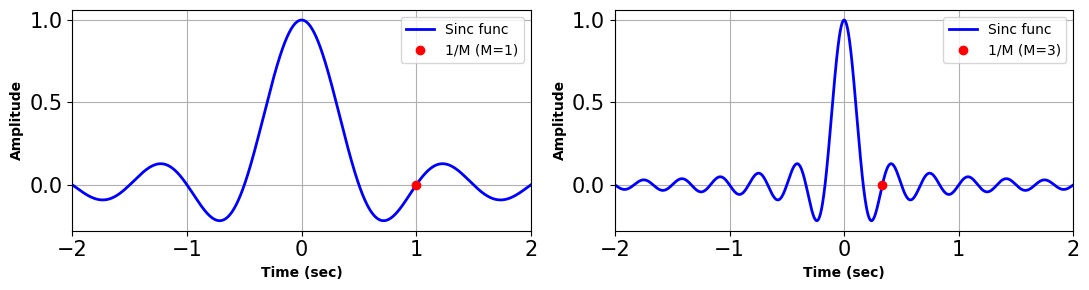

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sinc function
def sinc(t, M):
    return np.sin(2 * np.pi * t * M) / (2 * np.pi * M * t)

# Setup the figure and its size
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

# Parameters for the plot
t = np.linspace(-2, 2 + np.finfo(float).eps, 1000)
Ms = [1, 3] # when M is 1 and 3

# Loop to create each subplot
for ax, M in zip(axes, Ms):
    y = sinc(t, M)
    ax.plot(t, y, '-b', linewidth=2)
    ax.plot(1/M, 0, 'or', linewidth=4)
    ax.legend(['Sinc func', f'1/M (M={M})'])
    ax.axis('tight')
    ax.grid(True)
    ax.set_ylabel(r'Amplitude',fontweight='bold')
    ax.set_xlabel(r'Time (sec)',fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()


# Fourier Transform Pairs (Exponentially Decaying Symmetric Function)

Time signal: $x(t) = e^{-\lambda |t|}, \quad \lambda > 0 \quad$  
 
Frequency signal: $X(f) = \frac{2\lambda}{\lambda^2 + 4\pi^2 f^2}$

The amplitude of the frequency signal at 0 is $\frac{2}{\lambda}$  

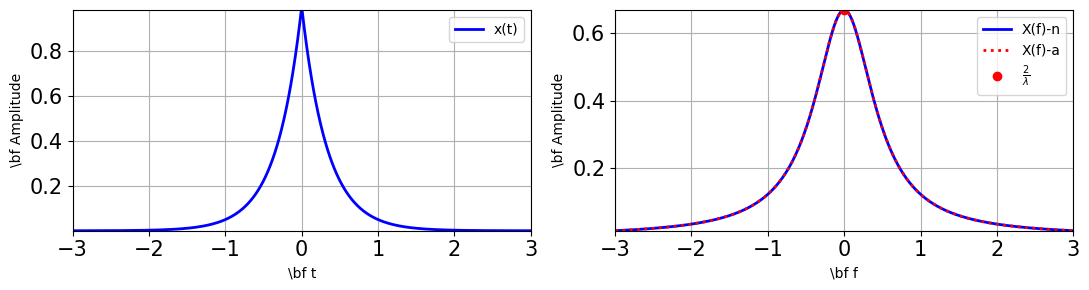

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# lambda value
_lambda = 3

# Time signal
def x(t):
    return np.exp(-_lambda * np.abs(t))

# Fourier integral of x(t)
def Xf(f):
    val_real = quad(lambda t: np.real(x(t) * np.exp(-1j * 2 * np.pi * f * t)), -np.inf, np.inf)[0]
    val_imag = quad(lambda t: np.imag(x(t) * np.exp(-1j * 2 * np.pi * f * t)), -np.inf, np.inf)[0]
    return val_real + 1j*val_imag
# We use the Fourier integral when we don't know the closed form solution.

# A closed form solution for X(f)
def Xf_analytic(f):
    return 2 * _lambda / (_lambda**2 + 4 * np.pi**2 * f**2)

# Discrete values for t and f
t = np.linspace(-3, 3, 600)
f = np.linspace(-3, 3, 600)

# Setup the figure and its size
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

# Plotting x(t)
axes[0].plot(t, x(t), '-b', linewidth=2)
axes[0].legend(['x(t)'])
axes[0].axis('tight')
axes[0].grid(True)
axes[0].set_ylabel(r'\bf Amplitude')
axes[0].set_xlabel(r'\bf t')
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[0].autoscale(enable=True, axis='both', tight=True)

# Plotting X(f)
Xf_values = np.vectorize(Xf)(f)
axes[1].plot(f, np.abs(Xf_values), '-b', linewidth=2)
axes[1].plot(f, Xf_analytic(f), ':r', linewidth=2)
axes[1].plot(0, 2/_lambda, 'or', linewidth=4)
axes[1].legend(['X(f)-n','X(f)-a', r'$\frac{2}{\lambda}$'])
axes[1].axis('tight')
axes[1].grid(True)
axes[1].set_ylabel(r'\bf Amplitude')
axes[1].set_xlabel(r'\bf f')
axes[1].tick_params(axis='both', which='major', labelsize=15)
axes[1].autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()
plt.show()

# Exponentially Decaying Symmetric Function with Different Lambda Values

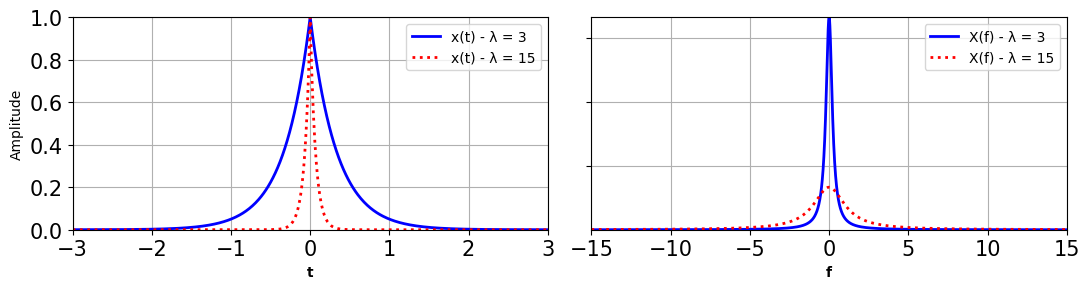

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# lambda = 3
x1 = lambda t: np.exp(-3 * np.abs(t))
Xf_analytic1 = lambda f: 2*3 / (3**2 + (4*np.pi*f)**2)

# lambda = 15
x2 = lambda t: np.exp(-15 * np.abs(t))
Xf_analytic2 = lambda f: 2*15 / (15**2 + (4*np.pi*f)**2)

# Define t and f ranges
t = np.arange(-3, 3.01, 0.01)
f = np.arange(-15, 15.01, 0.01)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(11, 3))

# Plot x(t) signals
axs[0].plot(t, x1(t), '-b', linewidth=2)
axs[0].plot(t, x2(t), ':r', linewidth=2)
axs[0].legend(['x(t) with \u03BB = 3', 'x(t) with \u03BB = 15'])
axs[0].grid(True)
axs[0].set_ylabel('Amplitude')
axs[0].set_xlabel('t', fontweight='bold')

# Plot X(f) signals
axs[1].plot(f, Xf_analytic1(f), '-b', linewidth=2)
axs[1].plot(f, Xf_analytic2(f), ':r', linewidth=2)
axs[1].legend(['X(f) with \u03BB = 3', 'X(f) with \u03BB = 15'])
axs[1].grid(True)
axs[1].set_ylabel('Amplitude')
axs[1].set_xlabel('f', fontweight='bold')

# Adjustments for aesthetics
for ax in axs:
    ax.label_outer()
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.autoscale(enable=True, axis='both', tight=True)

plt.tight_layout()
plt.show()

# Rectangular Function

Time signal: 
$
x(t) = 
\begin{cases} 
a & \text{for } |t| < b \\
0 & \text{for } |t| > b 
\end{cases}
$

Frequency signal: $ X(f) = \int_{-\infty}^{\infty} x(t)e^{-i2\pi ft} dt = \int_{-b}^{b} ae^{-i2\pi ft} dt = \frac{2ab \sin(2\pi fb)}{2\pi fb}$


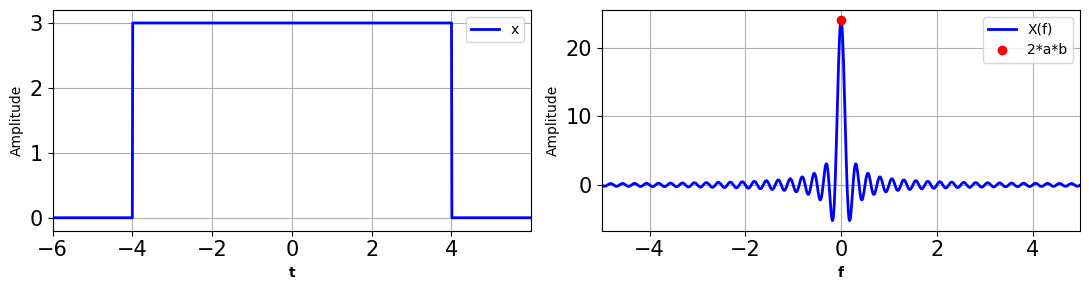

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define a rectangular function
def x(t, a, b):
    return a * (np.abs(t) <= b)

def Xf_analytic(f, a, b):
    return 2 * a * b * np.sin(2 * np.pi * f * b) / (2 * np.pi * f * b)

# Parameters for the rectangular function
a, b = 3, 4

# Define t and f values
t = np.arange(-6, 6, 0.01)
f = np.arange(-5, 5, 0.01) + np.finfo(float).eps

# Plot
fig, axes = plt.subplots(1, 2, figsize=(11, 3))
axes[0].plot(t, x(t, a, b), '-b', linewidth=2)
axes[0].legend('x(t)')
axes[0].set_ylabel('Amplitude')
axes[0].set_xlabel('t', fontweight='bold')
axes[0].grid(True)
axes[0].set_ylim([-0.2, 3.2])
axes[0].tick_params(axis='both', which='major', labelsize=15)
axes[0].autoscale(enable=True, axis='x', tight=True)


axes[1].plot(f, Xf_analytic(f, a, b), 'b', linewidth=2)
axes[1].plot(0, 2*a*b, 'or', linewidth=4)
axes[1].legend(['X(f)', '2*a*b'])
axes[1].set_ylabel('Amplitude')
axes[1].set_xlabel('f', fontweight='bold')
axes[1].grid(True)
axes[1].tick_params(axis='both', which='major', labelsize=15)
axes[1].autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

# Rectangular Function with Different Ranges

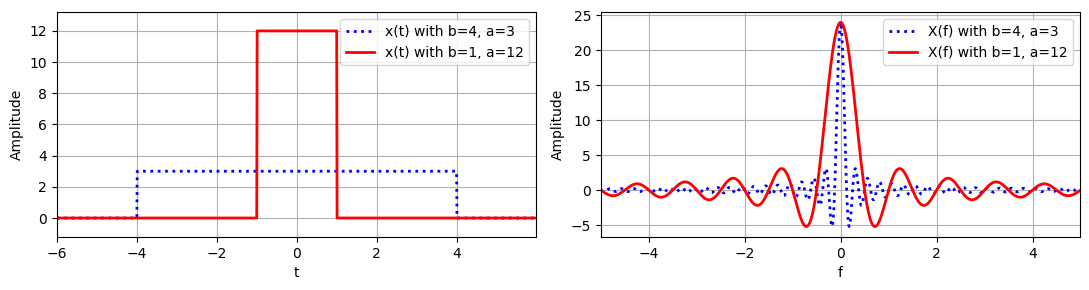

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Define rectangular function
def x(t, a, b):
    return a * (np.abs(t) <= b)

def Xf_analytic(f, a, b):
    return 2 * a * b * np.sin(2 * np.pi * f * b) / (2 * np.pi * f * b)

# Parameters for the rectangular function
a1, b1 = 3, 4
a2, b2 = 12, 1

# Define t and f values
t = np.arange(-6, 6, 0.01)
f = np.arange(-5, 5, 0.01) + np.finfo(float).eps

# Plot x(t) and X(f)
fig, axes = plt.subplots(1, 2, figsize=(11, 3))
axes[0].plot(t, x(t, a1, b1), ':b', t, x(t, a2, b2), '-r', linewidth=2)
axes[0].legend(['x(t) with b=4, a=3', 'x(t) with b=1, a=12'])
axes[0].set_ylabel('Amplitude')
axes[0].set_xlabel('t')
axes[0].grid(True)
axes[0].set_ylim([-a2 * 0.1, a2 * 1.1])
axes[0].autoscale(enable=True, axis='x', tight=True)

axes[1].plot(f, Xf_analytic(f, a1, b1), ':b', f, Xf_analytic(f, a2, b2), '-r', linewidth=2)
axes[1].legend(['X(f) with b=4, a=3', 'X(f) with b=1, a=12'])
axes[1].set_ylabel('Amplitude')
axes[1].set_xlabel('f')
axes[1].grid(True)
axes[1].autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()

# Fourier Transform Pairs (Damped Symmetrically Oscillating Function)

Time signal: $x(t) = e^{-a|t|} \cos(2\pi f_0 t)$

Frequency signal: $X(f) = \frac{a}{a^2 + [2\pi(f - f_0)]^2} + \frac{a}{a^2 + [2\pi(f + f_0)]^2}$


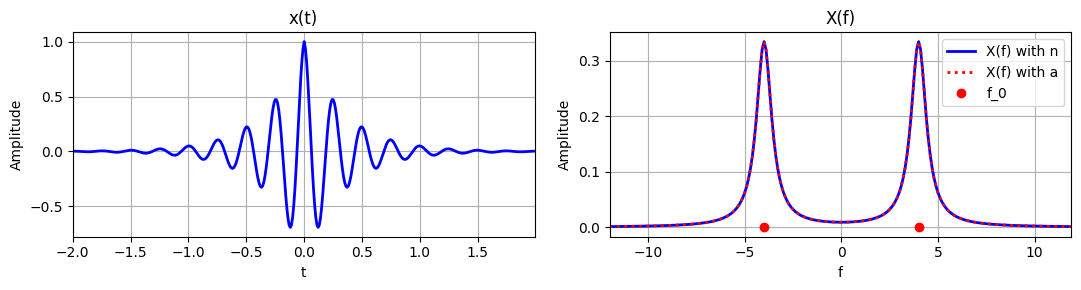

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define constants
a = 3
f_0 = 4

# Define functions
def x(t):
    return np.exp(-a * np.abs(t)) * np.cos(2 * np.pi * f_0 * t)

# Fourier integral of x(t)
def Xf(f):
    val_real = quad(lambda t: np.real(x(t) * np.exp(-1j * 2 * np.pi * f * t)), -np.inf, np.inf, limit=100)[0]
    val_imag = quad(lambda t: np.imag(x(t) * np.exp(-1j * 2 * np.pi * f * t)), -np.inf, np.inf, limit=100)[0]
    return val_real + 1j*val_imag
# We use the Fourier integral when we don't know the closed form solution.

def Xf_analytic(f):
    return a / (a**2 + (2 * np.pi * (f - f_0))**2) + a / (a**2 + (2 * np.pi * (f + f_0))**2)

# Define time and frequency domains
t = np.arange(-2, 2, 0.01)
f = np.arange(-12, 12, 0.1) + np.finfo(float).eps

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(11, 3))

ax[0].plot(t, x(t), '-b', linewidth=2)
ax[0].set_title('x(t)')
ax[0].set_ylabel('Amplitude')
ax[0].set_xlabel('t')
ax[0].grid(True)
ax[0].autoscale(enable=True, axis='x', tight=True)

Xf_values = [np.abs(Xf(freq)) for freq in f]
ax[1].plot(f, Xf_values, '-b', linewidth=2)
ax[1].plot(f, Xf_analytic(f), ':r', linewidth=2)
ax[1].plot([-f_0, f_0], [0, 0], 'or', linewidth=4)
ax[1].set_title('X(f)')
ax[1].set_ylabel('Amplitude')
ax[1].set_xlabel('f')
ax[1].legend(['X(f)-n', 'X(f)-a', 'f_0'])
ax[1].grid(True)
ax[1].autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()


# Fourier Transform Pairs (Gaussian Function)

Time signal: $x(t) = e^{-at^2}$

Frequency signal: $X(w) = \sqrt{\frac{\pi}{a}} \cdot e^{-\frac{w^2}{4a}}$

Gaussian curve: $ f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2} $

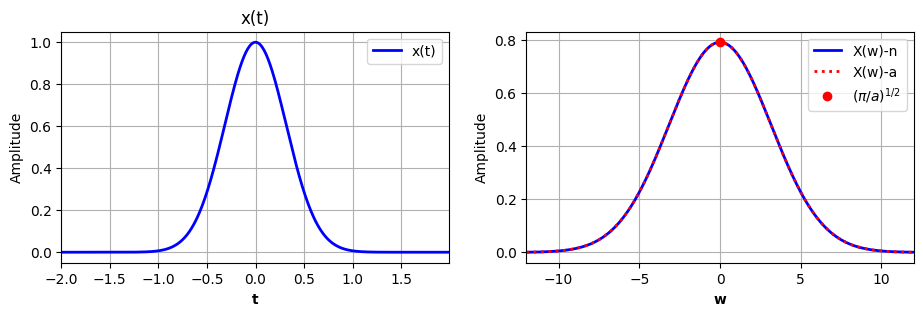

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

a = 5

# time signal
def x(t):
    return np.exp(-a*t*t)

# frequency signal
def Xw(w):
    val_real = quad(lambda t: np.real(x(t) * np.exp(-1j*w*t)), -np.inf, np.inf)[0]
    val_imag = quad(lambda t: np.imag(x(t) * np.exp(-1j*w*t)), -np.inf, np.inf)[0]
    return val_real + 1j*val_imag
# We use the Fourier integral when we don't know the closed form solution.

def Xw_analytic(w):
    return np.sqrt(np.pi/a) * np.exp(-w*w/(4*a))

t = np.arange(-2, 2, 0.01)
w = np.arange(-12, 12.01, 0.01) + np.finfo(float).eps

Xw_values = np.array([Xw(omega) for omega in w])
Xw_analytic_values = Xw_analytic(w)

plt.figure(figsize=(11,3))

# Plot x(t)
plt.subplot(1,2,1)
plt.plot(t, x(t), '-b', linewidth=2)
plt.legend(['x(t)'])
plt.grid(True)
plt.xlabel('t', fontweight='bold')
plt.ylabel('Amplitude')
plt.title('x(t)')
plt.autoscale(enable=True, axis='x', tight=True)

# Plot X(w)
plt.subplot(1,2,2)
plt.plot(w, Xw_values.real, '-b', linewidth=2)
plt.plot(w, Xw_analytic_values, ':r', linewidth=2)
plt.plot(0, np.sqrt(np.pi/a), 'or', linewidth=4)
plt.legend(['X(w)-n', 'X(w)-a', r'$(\pi/a)^{1/2}$'])
plt.grid(True)
plt.xlabel('w', fontweight='bold')
plt.ylabel('Amplitude')
plt.autoscale(enable=True, axis='x', tight=True)



# Gaussian Function with Different Variances

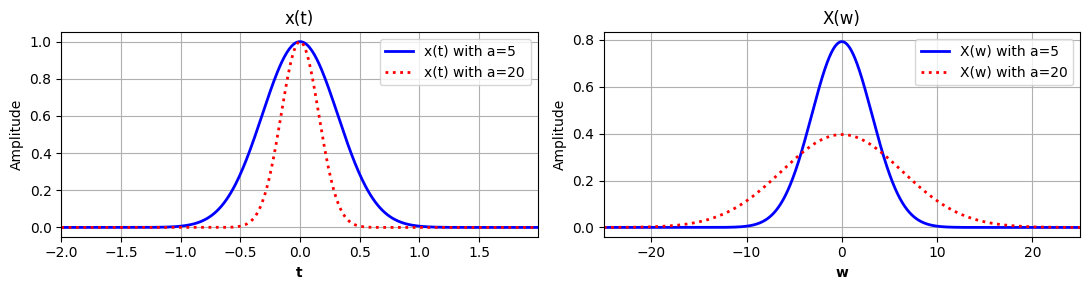

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def x(t, a):
    return np.exp(-a*t*t)

def Xw_analytic(w, a):
    return np.sqrt(np.pi/a) * np.exp(-w*w/(4*a))

t = np.arange(-2, 2, 0.01)
w = np.arange(-25, 25.01, 0.01) + np.finfo(float).eps

plt.figure(figsize=(11,3))

a1 = 5
a2 = 20

# Plot x(t) for both values of a
plt.subplot(1,2,1)
plt.plot(t, x(t, a1), '-b', linewidth=2)
plt.plot(t, x(t, a2), ':r', linewidth=2)
plt.legend(['x(t) with a=5', 'x(t) with a=20'])
plt.grid(True)
plt.xlabel('t', fontweight='bold')
plt.ylabel('Amplitude')
plt.title('x(t)')
plt.autoscale(enable=True, axis='x', tight=True)

# Plot X(w) for both values of a
plt.subplot(1,2,2)
plt.plot(w, Xw_analytic(w, a1), '-b', linewidth=2)
plt.plot(w, Xw_analytic(w, a2), ':r', linewidth=2)
plt.legend(['X(w) with a=5', 'X(w) with a=20'])
plt.grid(True)
plt.xlabel('w', fontweight='bold')
plt.ylabel('Amplitude')
plt.title('X(w)')
plt.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()